# Pymaceuticals Inc.
---

### Analysis

- One of the first observations to be made is Capomulin is the second best drug regimen with the 2nd lowest Mean and Median tumor volume 40.68 and 41.56 respectively after Ramicane with 40.22 and 40.67 mean and median tumor volume respectively. These 2 drugs also present the highest number of mice tested.

- Overall there were more male than female mice tested, 51.0% versus 49.0%.

- Out of the 4 most promising drugs, Capomulin, Ramicane, Infubinol and Certamin that we took a closer look at, Infubinol is the drug that presents an outlying tumor volume size. Capomulin and Ramicane inter-quartile ranges almost overlap, and are lower (i.e also lower median tumor volume) and therefore support our very first observation, and differ significantly from the other 2 drugs,  Infubinol and Certamin.

- Looking at the line plot also we can see that mice under Capomulin drug regimen saw their tumor volume regress as time progressed. Also from the scatter plot and correlation of 0.84 we can tell that there is a positive correlation between a mouse tumor volume and its weight, at least as depicted with the Capomulin drug regimen.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')
# Display the iinitially merged data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Cleaning up the data
clean_df = df.drop_duplicates(subset=['Mouse ID'], ignore_index=True)

# Display the data table for preview
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
#clean_data_df['Mouse ID'].count()
mice_count = len(df['Mouse ID'].unique())
mice_count

249

In [7]:
# Getting the Data for all duplicated 'Mouse ID' and 'Timepoint'
duplicate = df[df.duplicated(subset = ['Mouse ID','Timepoint'], keep=False)]
duplicate.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_Mouse_ID = duplicate['Mouse ID'].unique()
duplicated_Mouse_ID

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = df.loc[df['Mouse ID'] == 'g989']
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df = df.loc[df['Mouse ID'] != 'g989']


In [11]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(data_df['Mouse ID'].unique())
new_mice_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_data_df = data_df.groupby(['Drug Regimen'])

# Calculating the tumor volume mean by drug regimen
mean_tumor_volume = grouped_data_df['Tumor Volume (mm3)'].mean()

# Calculating the tumor volume median by drug regimen
median_tumor_volume = grouped_data_df['Tumor Volume (mm3)'].median()

# Calculating the tumor volume variance by drug regimen
var_tumor_volume = grouped_data_df['Tumor Volume (mm3)'].var()

# Calculating the tumor volume standard deviation by drug regimen
std_tumor_volume = grouped_data_df['Tumor Volume (mm3)'].std()

# Calculating the tumor volume SEM by drug regimen
sem_tumor_volume = grouped_data_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_stats_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                                     "Median Tumor Volume":median_tumor_volume,
                                     "Tumor Volume Variance":var_tumor_volume,
                                     "Tumor Volume Std. Dev.":std_tumor_volume,
                                     "Tumor Volume Std. Err.":sem_tumor_volume
                                     })
tumor_volume_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_tumor_volume_stats_df = grouped_data_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tumor_volume_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:

mice_per_regimen = grouped_data_df['Mouse ID'].count()
mice_per_regimen.head(10)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

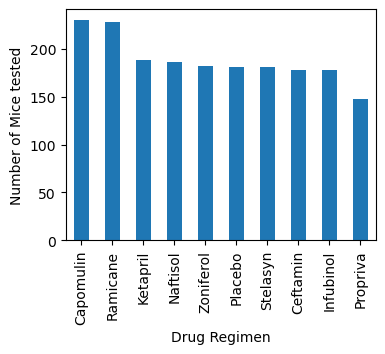

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig1a = mice_per_regimen.sort_values(ascending = False).plot(kind='bar', xlabel = 'Drug Regimen', ylabel = 'Number of Mice tested', figsize = [4, 3])

Text(0, 0.5, 'Number of Mice tested')

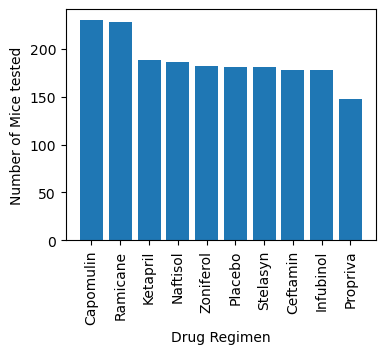

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# But first, we'll sort the total mice tested per drug regimen in a descending order
sorted_mice_per_regimen = mice_per_regimen.sort_values(ascending = False)

drugs = sorted_mice_per_regimen.keys()
x_axis = drugs
tick_locations = [value for value in x_axis]

plt.figure(figsize=(4,3))
plt.bar(x_axis, sorted_mice_per_regimen)

plt.xticks(tick_locations, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice tested")

In [17]:
gender_group_data_df = data_df.groupby(["Sex"]); 
gender_count = gender_group_data_df["Mouse ID"].count()
sorted_gender_count = gender_count.sort_values(ascending = False)
sorted_gender_count

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Sex')

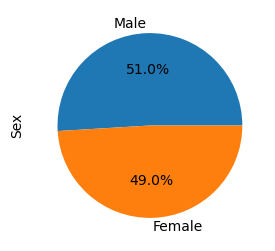

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(4,3))
plt.pie(sorted_gender_count, labels=sorted_gender_count.keys(), autopct="%1.1f%%")
plt.ylabel("Sex")

<AxesSubplot:ylabel='Sex'>

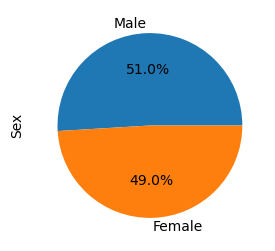

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sorted_gender_count.plot(kind="pie", figsize=(4,3), ylabel='Sex', autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# First creating a grouped DataFrame that shows the last (greatest) time point for each mouse.
grouped_by_mouse_df = data_df.groupby(["Mouse ID"])
last_timepoint_per_mouse = (grouped_by_mouse_df.max())["Timepoint"].reset_index()
last_timepoint_per_mouse

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
df1 = pd.merge(data_df, last_timepoint_per_mouse, on="Mouse ID" )

final_tumor_volume_df = df1.loc[(df1["Timepoint_x"] == df1["Timepoint_y"]), :].reset_index()
final_tumor_volume_df

,index,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,9,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,10,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,18,g107,35,71.905117,0,Ketapril,Female,2,29,35
3,21,a457,10,49.783419,0,Ketapril,Female,11,30,10
4,30,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...,...
243,1844,t565,45,34.455298,0,Capomulin,Female,20,17,45
244,1854,i557,45,47.685963,1,Capomulin,Female,1,24,45
245,1864,m957,45,33.329098,1,Capomulin,Female,3,19,45
246,1869,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
best_drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = [[],[],[],[]]

# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
# Append the resulting final tumor volumes for each drug to the empty list.
for i in range(len(best_drug_regimen)):
    for index, row in final_tumor_volume_df.iterrows():
        if best_drug_regimen[i] == row["Drug Regimen"]:
            tumor_volumes[i].append(row["Tumor Volume (mm3)"])
            

In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
    
# Determine outliers using upper and lower bounds
for i in range(len(tumor_volumes)):
    quartiles = pd.DataFrame(tumor_volumes[i]).quantile([.25,.5,.75])
    lowerq = quartiles.loc[(0.25),0]
    upperq = quartiles.loc[(0.75),0]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
# Identifying the IQR’s for each treatment
    print(f"{best_drug_regimen[i]}")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
# Dertimining the outliers according to the IQR criteria and printing the results
    for x in tumor_volumes[i]:
        if x > upper_bound:
            print(f"{x:.2f} is an outlier")
        elif x < lower_bound:
            print(f"{x:.2f} is an outlier")  

Capomulin
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.
Ramicane
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Infubinol
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
36.32 is an outlier
Ceftamin
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


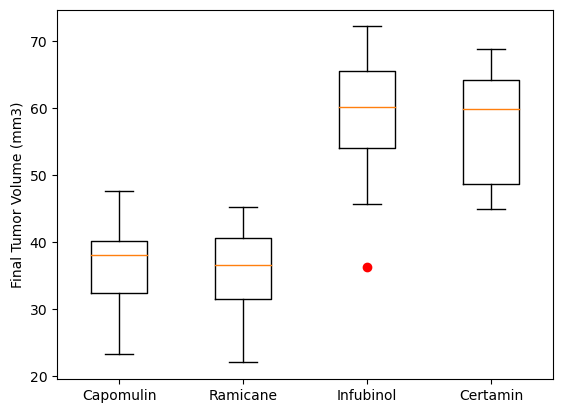

In [24]:
labels = ["Capomulin","Ramicane", "Infubinol", "Certamin"]
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volumes,showmeans=False, labels = labels, sym='ro')
#ax1.boxplot(Ramicane,showmeans=True)
#ax1.boxplot(Infubinol,showmeans=True)
#ax1.boxplot(Certamin,showmeans=True)
plt.show()

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [26]:
#Creating a Dataframe for the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [27]:
#Creating a Dataframe for the mouse ID we are interested in.
l509_df = data_df.loc[data_df['Mouse ID'] == 'l509']
l509_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


<AxesSubplot:title={'center':'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

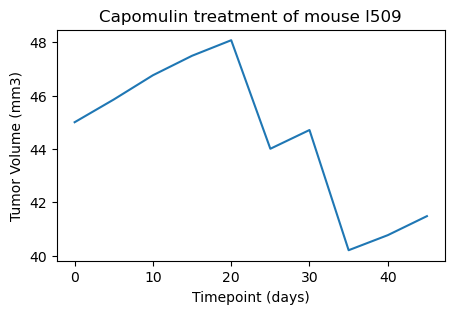

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title='Capomulin treatment of mouse l509',
            xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', legend=False, figsize=(5,3))

In [29]:
#Creating a Capomulin regimen dataframe grouped by Mouse ID with average tumor volume and mouse weight
avg_capomulin_df = capomulin_df.groupby(['Mouse ID']).mean()
avg_capomulin_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

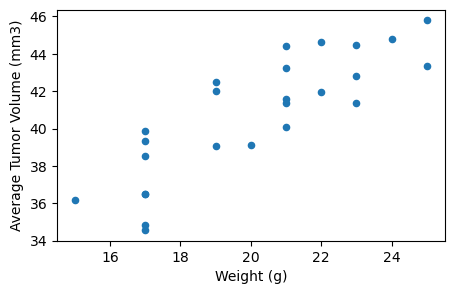

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capomulin_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)',
            xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)', figsize=(5,3))


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


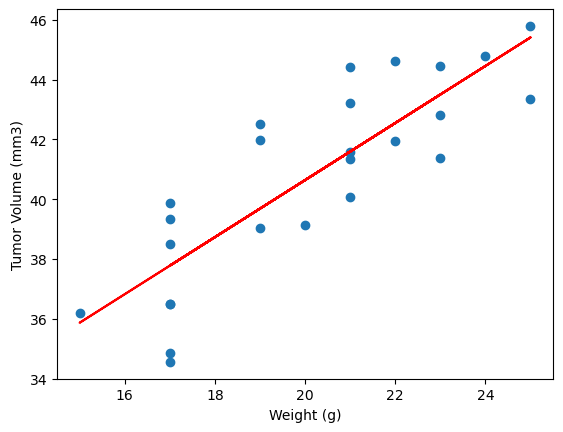

In [31]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capomulin_df['Weight (g)']
avg_tumor_volume = avg_capomulin_df['Tumor Volume (mm3)']

correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot

x_values = mouse_weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()